# Pare Down Data Scope for Project (CA vs. TX)
- look at all levels of granularity to determine what the State of California Coverage is: 
    - County
        - 58 total counties
        - 57 in the dataset (or 285,747 records)
    - City
        - 482 total cities
        - 807 in the dataset (or 201,417 records)
        - Note: Zillow draws no distinction b/t municipalities vs. cities therefore it's a pretty complete
    - Zip Code
        - 2.6K+ total zipcodes in CA
        - 1.3K in the dataset (or 332,663 records)
   
   
- Alternatively, consider paring down the scope of the work to Texas
    - County 
    - City
    - Zip

In [1]:
import pandas as pd 
import numpy as np
import json
import tqdm

import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from pprint import pprint

import zipcodes

# Append the entire repo parent director so files therein can be accessed in notebook
import os
import sys
import pathlib
sys.path.append(str(pathlib.Path().absolute().parent))

### Import Data

In [3]:
county_ts = pd.read_csv('../data/raw/zecon/County_time_series.csv')
city_ts = pd.read_csv('../data/raw/zecon/City_time_series.csv')
zip_ts = pd.read_csv('../data/raw/zecon/Zip_time_series.csv')

fips_mapping = pd.read_pickle('../data/interim/fips_map.pickle')

### Pare down to California at each level

#### County-Level Scope Down for California

In [4]:
county_ts_merged = county_ts.merge(fips_mapping,
                                    how='left',
                                    on='RegionName')

In [5]:
ca_county_ts = county_ts_merged[county_ts_merged['State'] == 'CA']
ca_county_ts.drop(['Unique_City_ID', 'City', 'MetroName', 'StateName'], axis=1, inplace=True)

display(ca_county_ts.head(3))
display(ca_county_ts.shape)

Date  RegionName  DaysOnZillow_AllHomes  \
15443  1996-04-30        6001                    NaN   
15444  1996-04-30        6001                    NaN   
15445  1996-04-30        6001                    NaN   

       InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
15443                                   NaN                    NaN   
15444                                   NaN                    NaN   
15445                                   NaN                    NaN   

       MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
15443                                 NaN                                 NaN   
15444                                 NaN                                 NaN   
15445                                 NaN                                 NaN   

       MedianListingPricePerSqft_3Bedroom  MedianListingPricePerSqft_4Bedroom  \
15443                                 NaN                                 NaN   
15444                                 NaN                                 NaN   
15445                                 NaN                                 NaN   

       MedianListingPricePerSqft_5BedroomOrMore  ...  \
15443                                       NaN  ...   
15444                                       NaN  ...   
15445                                       NaN  ...   

       ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
15443                    204600.0      293000.0           NaN   
15444                    204600.0      293000.0           NaN   
15445                    204600.0      293000.0           NaN   

       ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
15443                          NaN                  NaN   
15444                          NaN                  NaN   
15445                          NaN                  NaN   

       Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  \
15443                             NaN                              NaN   
15444                             NaN                              NaN   
15445                             NaN                              NaN   

       CensusRegion   County  State  
15443          West  Alameda     CA  
15444          West  Alameda     CA  
15445          West  Alameda     CA  

[3 rows x 85 columns]

(285747, 85)

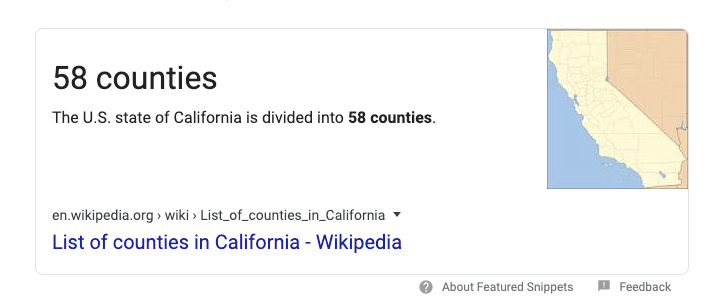

In [6]:
ca_county_ts['RegionName'].nunique()

57

#### City-Level Scope Down for California

In [7]:
city_ts_merged = city_ts.merge(fips_mapping,
                              how='left',
                              left_on='RegionName',
                              right_on='Unique_City_ID')
print(city_ts.shape)
print(city_ts_merged.shape)

(3762566, 81)
(3762566, 89)


In [8]:
ca_city_ts = city_ts_merged[city_ts_merged['State'] == 'CA']
ca_city_ts.shape

(201417, 89)

In [9]:
ca_city_ts.rename(columns={'RegionName_x': 'RegionName'}, inplace=True)
ca_city_ts.drop('RegionName_y', axis=1, inplace=True)

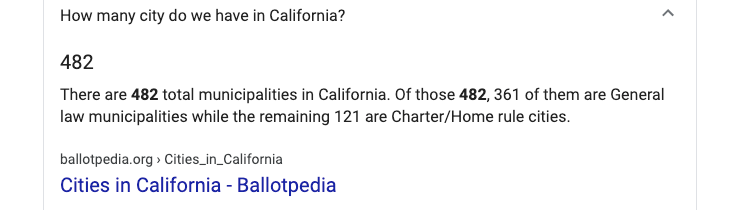

In [10]:
ca_city_ts['Unique_City_ID'].nunique()

807

In [11]:
len(set([ca_cityID for ca_cityID in ca_city_ts['Unique_City_ID'] if ca_cityID[-2:] == 'ca' ]))

807

#### Zip-Level Scope Down for California
- The provided data only captures about 1.3K of possible 2.6K unique zip codes in the state of California
- Use the `zipcodes` package to see if I can link in the city data to see what we have in total for the state of California.

In [12]:
zip_ts['ZipCode_str'] = zip_ts['RegionName'].astype(str)
zip_ts['ZipCode_str'] = ['0' + zipcode if len(zipcode) == 4 else zipcode for zipcode in zip_ts['ZipCode_str']]
zip_ts.head(3)

Date  RegionName  InventorySeasonallyAdjusted_AllHomes  \
0  1996-04-30        1001                                   NaN   
1  1996-04-30        1002                                   NaN   
2  1996-04-30        1005                                   NaN   

   InventoryRaw_AllHomes  MedianListingPricePerSqft_1Bedroom  \
0                    NaN                                 NaN   
1                    NaN                                 NaN   
2                    NaN                                 NaN   

   MedianListingPricePerSqft_2Bedroom  MedianListingPricePerSqft_3Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   

   MedianListingPricePerSqft_4Bedroom  \
0                                 NaN   
1                                 NaN   
2                                 NaN   

   MedianListingPricePerSqft_5BedroomOrMore  \
0                                       NaN   
1                                       NaN   
2                                       NaN   

   MedianListingPricePerSqft_AllHomes  ...  ZHVI_CondoCoop  ZHVI_MiddleTier  \
0                                 NaN  ...         67000.0         101900.0   
1                                 NaN  ...         81300.0         135200.0   
2                                 NaN  ...             NaN         101200.0   

   ZHVI_SingleFamilyResidence  ZHVI_TopTier  ZRI_AllHomes  \
0                    107000.0      124800.0           NaN   
1                    145800.0      213600.0           NaN   
2                    101200.0      125700.0           NaN   

   ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0                          NaN                  NaN   
1                          NaN                  NaN   
2                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  \
0                             NaN                              NaN   
1                             NaN                              NaN   
2                             NaN                              NaN   

   ZipCode_str  
0        01001  
1        01002  
2        01005  

[3 rows x 77 columns]

In [13]:
# California zipcodes all start with 9
potential_CA_zipcodes = [zipcode for zipcode in zip_ts['ZipCode_str'].unique().tolist() if zipcode[0] == '9']

# Filter down on these potential California zipcodes
maybe_ca_zip_ts = zip_ts[zip_ts['ZipCode_str'].isin(potential_CA_zipcodes)]
maybe_ca_zip_ts.shape

(511863, 77)

In [14]:
len(potential_CA_zipcodes)

2036

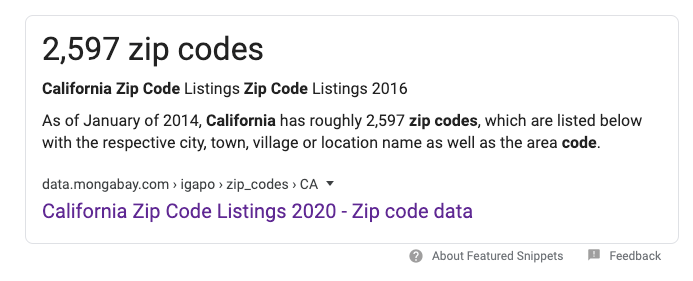

In [15]:
confirmed_CA_zips = []

for zipcode in potential_CA_zipcodes:
    zip_info = zipcodes.matching(zipcode)[0]
    if zip_info['state'] == 'CA':
        confirmed_CA_zips.append(zipcode)
    else:
        pass
    
len(confirmed_CA_zips)

1311

In [16]:
ca_zip_ts = maybe_ca_zip_ts[maybe_ca_zip_ts['ZipCode_str'].isin(confirmed_CA_zips)]
ca_zip_ts.shape

(332663, 77)

In [17]:
ca_zip_ts.head(3)

Date  RegionName  InventorySeasonallyAdjusted_AllHomes  \
11779  1996-04-30       90001                                   NaN   
11780  1996-04-30       90002                                   NaN   
11781  1996-04-30       90003                                   NaN   

       InventoryRaw_AllHomes  MedianListingPricePerSqft_1Bedroom  \
11779                    NaN                                 NaN   
11780                    NaN                                 NaN   
11781                    NaN                                 NaN   

       MedianListingPricePerSqft_2Bedroom  MedianListingPricePerSqft_3Bedroom  \
11779                                 NaN                                 NaN   
11780                                 NaN                                 NaN   
11781                                 NaN                                 NaN   

       MedianListingPricePerSqft_4Bedroom  \
11779                                 NaN   
11780                                 NaN   
11781                                 NaN   

       MedianListingPricePerSqft_5BedroomOrMore  \
11779                                       NaN   
11780                                       NaN   
11781                                       NaN   

       MedianListingPricePerSqft_AllHomes  ...  ZHVI_CondoCoop  \
11779                                 NaN  ...             NaN   
11780                                 NaN  ...             NaN   
11781                                 NaN  ...             NaN   

       ZHVI_MiddleTier  ZHVI_SingleFamilyResidence  ZHVI_TopTier  \
11779         114100.0                    114100.0      128400.0   
11780         105700.0                    105700.0      121300.0   
11781         103800.0                    103800.0      124000.0   

       ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
11779           NaN                          NaN                  NaN   
11780           NaN                          NaN                  NaN   
11781           NaN                          NaN                  NaN   

       Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  \
11779                             NaN                              NaN   
11780                             NaN                              NaN   
11781                             NaN                              NaN   

       ZipCode_str  
11779        90001  
11780        90002  
11781        90003  

[3 rows x 77 columns]

In [18]:
ca_county_ts.reset_index(drop=True, inplace=True)
ca_city_ts.reset_index(drop=True, inplace=True)
ca_zip_ts.reset_index(drop=True, inplace=True)

ca_county_ts.to_pickle('../data/interim/california-county-ts.pickle')
ca_city_ts.to_pickle('../data/interim/california-city-ts.pickle')
ca_zip_ts.to_pickle('../data/interim/california-zip-ts.pickle')

### ZipCode Data Expansion
**OBJECTIVE** Since there are only 1.3K zipcodes in the Zillow Data, try to use the city time series data to see if we can expand upon what's available to us in the zipcode regions. Explore to see if we can use latitude and longitude metadata to aid in this effort.

- The CA city data holds 110 unique cities more than the CA Zip data.
- Notably, sometimes a particular city can have > 1 zipcode. 
- This could be what's driving the difference between the two datasets.


In [19]:
# Get city names for the zip_ts data 
# Then check to see which cities do NOT overlap vs. those that DO overlap with that of city_time series

zip_city_map = dict()
zip_county_map = dict()
zip_latlong = dict()

for zipcode in ca_zip_ts['ZipCode_str'].unique():
    zipinfo = zipcodes.matching(zipcode)
    try: 
        for info in zipinfo:
            zip_city_map[zipcode] = info['city']
            zip_county_map[zipcode] = info['county']
            zip_latlong[zipcode] = {'Lat' : info['lat'], 'Long' : info['long']}
            
    except:
        pass

print(len(zip_city_map))
print(len(zip_county_map))
print(len(zip_latlong))

1311
1311
1311


In [20]:
ca_zip_ts['City'] = [zip_city_map[row.ZipCode_str] for row in ca_zip_ts.itertuples()]
ca_zip_ts['County'] = [zip_county_map[row.ZipCode_str] for row in ca_zip_ts.itertuples()]
ca_zip_ts['Lat'] = [zip_latlong[row.ZipCode_str]['Lat'] for row in ca_zip_ts.itertuples()]
ca_zip_ts['Long'] = [zip_latlong[row.ZipCode_str]['Long'] for row in ca_zip_ts.itertuples()]

In [21]:
# Cities missing from the ca_zip_ts table: 
missing_cities = sorted(list(set(ca_city_ts['City'].unique()) - (set(ca_zip_ts['City'].unique()))))
print(len(missing_cities))
print(missing_cities[:5])

110
['Alondra Park', 'Alta', 'Alum Rock', 'Angels', 'Annapolis']


In [35]:
ca_zip_ts.head()

Date  RegionName  InventorySeasonallyAdjusted_AllHomes  \
0  1996-04-30       90001                                   NaN   
1  1996-04-30       90002                                   NaN   
2  1996-04-30       90003                                   NaN   
3  1996-04-30       90004                                   NaN   
4  1996-04-30       90005                                   NaN   

   InventoryRaw_AllHomes  MedianListingPricePerSqft_1Bedroom  \
0                    NaN                                 NaN   
1                    NaN                                 NaN   
2                    NaN                                 NaN   
3                    NaN                                 NaN   
4                    NaN                                 NaN   

   MedianListingPricePerSqft_2Bedroom  MedianListingPricePerSqft_3Bedroom  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

   MedianListingPricePerSqft_4Bedroom  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

   MedianListingPricePerSqft_5BedroomOrMore  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   MedianListingPricePerSqft_AllHomes  ...  ZRI_AllHomes  \
0                                 NaN  ...           NaN   
1                                 NaN  ...           NaN   
2                                 NaN  ...           NaN   
3                                 NaN  ...           NaN   
4                                 NaN  ...           NaN   

   ZRI_AllHomesPlusMultifamily  ZriPerSqft_AllHomes  \
0                          NaN                  NaN   
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   

   Zri_MultiFamilyResidenceRental  Zri_SingleFamilyResidenceRental  \
0                             NaN                              NaN   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   

   ZipCode_str         City              County      Lat       Long  
0        90001  Los Angeles  Los Angeles County  33.9736  -118.2479  
1        90002  Los Angeles  Los Angeles County  33.9490  -118.2460  
2        90003  Los Angeles  Los Angeles County  33.9640  -118.2737  
3        90004  Los Angeles  Los Angeles County  34.0761  -118.3108  
4        90005  Los Angeles  Los Angeles County  34.0584  -118.3113  

[5 rows x 81 columns]

### Get Latitude Longitude Information for as many records as possible
- Using the city data, we have 1.1K more zip codes for CA than what the zipcode table provided by Zillow gives us.
- We need to refer to city data where certain zipcodes are not available in the Zip table provided by Zillow.

In [22]:
fips_mapping_CA = fips_mapping.loc[fips_mapping['State'] == 'CA']
fips_mapping_CA.reset_index(drop=True, inplace=True)

zip_meta = dict()
for row in fips_mapping_CA.itertuples():
    city_to_check = row.City
    info = zipcodes.filter_by(city=city_to_check)
    for i in info:
        if row.County in i['county']:
            zip_meta[i['zip_code']] = {'Lat': float(i['lat']), 
                                          'Long': float(i['long']),
                                          'City' : i['city'],
                                          'County' : i['county'].replace(" County", "")}
zip_meta_df = pd.DataFrame(zip_meta).T
zip_meta_df.reset_index(inplace=True)

In [23]:
zip_meta_df

index      Lat     Long           City   County
0     94587  37.6021 -122.044     Union City  Alameda
1     94546  37.7483 -122.116  Castro Valley  Alameda
2     94552  37.6953 -121.982  Castro Valley  Alameda
3     94608  37.8347 -122.292     Emeryville  Alameda
4     94662  37.8317 -122.284     Emeryville  Alameda
...     ...      ...      ...            ...      ...
2334  95936  39.6115 -120.848    Downieville   Sierra
2335  96126  39.5768 -120.219    Sierraville   Sierra
2336  96125  39.5496 -120.674    Sierra City   Sierra
2337  96118  39.6706 -120.159       Loyalton   Sierra
2338  95910  39.4851 -120.833      Alleghany   Sierra

[2339 rows x 5 columns]

In [24]:
city_uniqueCityID = dict(zip(fips_mapping_CA['City'], fips_mapping_CA['Unique_City_ID']))
city_metroName = dict(zip(fips_mapping_CA['City'], fips_mapping_CA['MetroName']))
city_regionName = dict(zip(fips_mapping_CA['City'], fips_mapping_CA['RegionName']))

In [25]:
zip_meta_df['State'] = 'CA'
zip_meta_df['StateName'] = 'California'
zip_meta_df['CensusRegion'] = 'West'

metroname_column = list()
uniquecityID_column = list()
regionname_column = list()

for city in zip_meta_df['City']:
    if city in city_uniqueCityID and city in city_metroName:
        uniquecityID_column.append(city_uniqueCityID[city])
        metroname_column.append(city_metroName[city])
        regionname_column.append(city_regionName[city])
    else:
        uniquecityID_column.append(np.nan)
        metroname_column.append(np.nan)
        regionname_column.append(np.nan)
        
zip_meta_df['Unique_City_ID'] = uniquecityID_column
zip_meta_df['MetroName'] = metroname_column
zip_meta_df['RegionName'] = regionname_column

zip_meta_df.rename(columns={'index':'ZipCode'}, inplace=True)

In [26]:
display(zip_meta_df.head())
display(zip_meta_df.info())

ZipCode      Lat     Long           City   County State   StateName  \
0   94587  37.6021 -122.044     Union City  Alameda    CA  California   
1   94546  37.7483 -122.116  Castro Valley  Alameda    CA  California   
2   94552  37.6953 -121.982  Castro Valley  Alameda    CA  California   
3   94608  37.8347 -122.292     Emeryville  Alameda    CA  California   
4   94662  37.8317 -122.284     Emeryville  Alameda    CA  California   

  CensusRegion          Unique_City_ID          MetroName  RegionName  
0         West     union_cityalamedaca  San Francisco, CA        6001  
1         West  castro_valleyalamedaca  San Francisco, CA        6001  
2         West  castro_valleyalamedaca  San Francisco, CA        6001  
3         West     emeryvillealamedaca  San Francisco, CA        6001  
4         West     emeryvillealamedaca  San Francisco, CA        6001

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZipCode         2339 non-null   object
 1   Lat             2339 non-null   object
 2   Long            2339 non-null   object
 3   City            2339 non-null   object
 4   County          2339 non-null   object
 5   State           2339 non-null   object
 6   StateName       2339 non-null   object
 7   CensusRegion    2339 non-null   object
 8   Unique_City_ID  2339 non-null   object
 9   MetroName       2220 non-null   object
 10  RegionName      2339 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 201.1+ KB


None

In [27]:
fips_zip_mapping_CA = zip_meta_df.copy()
del zip_meta_df

In [28]:
missing_zips = set(fips_zip_mapping_CA['ZipCode']) - set(ca_zip_ts['ZipCode_str'])

print(len(missing_zips))

1115


In [29]:
missings = fips_zip_mapping_CA[fips_zip_mapping_CA['ZipCode'].isin(missing_zips)] # | 
#                                fips_zip_mapping_CA['City'].isin(missing_cities)]

missings.Unique_City_ID.value_counts()

sacramentosacramentoca          76
san_diegosan_diegoca            51
san_franciscosan_franciscoca    41
fresnofresnoca                  41
los_angeleslos_angelesca        38
                                ..
paradisebutteca                  1
robbinssutterca                  1
byroncontra_costaca              1
homelandriversideca              1
camarilloventuraca               1
Name: Unique_City_ID, Length: 555, dtype: int64

In [30]:
len(set(fips_zip_mapping_CA['ZipCode']).union(set(ca_zip_ts['ZipCode_str'])))

2426

### Check Data Sparsity Across All Sets
**NOTE: Will use ZHVI and ZRI group of columns since they seem to be the ones that are least sparse.**

For the state of California:

- Zip 
- City

In [31]:
# To make the data more manageable to work w/, just grab the columns we give a sh* about
ZHVI_ZRI_columns = ['ZHVIPerSqft_AllHomes', 'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_AllHomes',
       'PctOfListingsWithPriceReductionsSeasAdj_CondoCoop',
       'PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence',
       'PctOfListingsWithPriceReductions_AllHomes',
       'PctOfListingsWithPriceReductions_CondoCoop',
       'PctOfListingsWithPriceReductions_SingleFamilyResidence',
       'PriceToRentRatio_AllHomes', 'ZHVI_1bedroom', 'ZHVI_2bedroom',
       'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore',
       'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier',
       'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier', 'ZRI_AllHomes',
       'ZRI_AllHomesPlusMultifamily', 'ZriPerSqft_AllHomes',
       'Zri_MultiFamilyResidenceRental', 'Zri_SingleFamilyResidenceRental']

fips_loc_columns = ['ZipCode_str', 'City', 'County', 'Lat', 'Long']

city_ts_columns = ['Date', 'MetroName', 'StateName', 'CensusRegion', 'Unique_City_ID', 'City', 'County', 'State']
zip_ts_columns = ['Date', 'RegionName', 'ZipCode_str', 'City', 'County', 'Lat', 'Long']

In [32]:
ca_city_zill_ts = ca_city_ts[city_ts_columns + ZHVI_ZRI_columns]
ca_zip_zill_ts = ca_zip_ts[zip_ts_columns + ZHVI_ZRI_columns]

display(ca_city_zill_ts.shape)
display(ca_zip_zill_ts.shape)

(201417, 34)

(332663, 33)

In [33]:
ca_zip_zill_ts.rename(columns={'RegionName':'ZipCode_int'}, inplace=True)
ca_zip_zill_ts['County'] = [countyname.replace(" County", "") if " County" in countyname else countyname 
                            for countyname in ca_zip_zill_ts['County']]

ca_zip_w_fips = ca_zip_zill_ts.merge(fips_mapping_CA,
                                     how='left',
                                     on=['City', 'County'])

display(ca_zip_w_fips.shape)
display(ca_zip_w_fips.info())
display(ca_zip_w_fips.head(3))

(332663, 39)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332663 entries, 0 to 332662
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Date                                                           332663 non-null  object 
 1   ZipCode_int                                                    332663 non-null  int64  
 2   ZipCode_str                                                    332663 non-null  object 
 3   City                                                           332663 non-null  object 
 4   County                                                         332663 non-null  object 
 5   Lat                                                            332663 non-null  object 
 6   Long                                                           332663 non-null  object 
 7   ZHVIPerSqft_AllHomes                           

None

Date  ZipCode_int ZipCode_str         City       County      Lat  \
0  1996-04-30        90001       90001  Los Angeles  Los Angeles  33.9736   
1  1996-04-30        90002       90002  Los Angeles  Los Angeles  33.9490   
2  1996-04-30        90003       90003  Los Angeles  Los Angeles  33.9640   

        Long  ZHVIPerSqft_AllHomes  PctOfHomesDecreasingInValues_AllHomes  \
0  -118.2479                 108.0                                    NaN   
1  -118.2460                  95.0                                    NaN   
2  -118.2737                  96.0                                    NaN   

   PctOfHomesIncreasingInValues_AllHomes  ...  ZRI_AllHomesPlusMultifamily  \
0                                    NaN  ...                          NaN   
1                                    NaN  ...                          NaN   
2                                    NaN  ...                          NaN   

   ZriPerSqft_AllHomes  Zri_MultiFamilyResidenceRental  \
0                  NaN                             NaN   
1                  NaN                             NaN   
2                  NaN                             NaN   

   Zri_SingleFamilyResidenceRental  RegionName  \
0                              NaN      6037.0   
1                              NaN      6037.0   
2                              NaN      6037.0   

                            MetroName   StateName  CensusRegion  \
0  Los Angeles-Long Beach-Anaheim, CA  California          West   
1  Los Angeles-Long Beach-Anaheim, CA  California          West   
2  Los Angeles-Long Beach-Anaheim, CA  California          West   

             Unique_City_ID  State  
0  los_angeleslos_angelesca     CA  
1  los_angeleslos_angelesca     CA  
2  los_angeleslos_angelesca     CA  

[3 rows x 39 columns]

In [34]:
ca_w_zips_ts = ca_city_zill_ts.merge(fips_zip_mapping_CA,
                                     on='Unique_City_ID',
                                     how='left',
                                     suffixes=('', '_y'))

# Remove duplicate columns as a result of the merge
for col in ca_w_zips_ts.columns:
    if '_y' in col:
        ca_w_zips_ts.drop(col, axis=1, inplace=True)
    else:
        pass

ca_w_zips_ts = ca_w_zips_ts[~ca_w_zips_ts['ZipCode'].isin(list(set(ca_zip_zill_ts['ZipCode_str'])))]  
ca_w_zips_ts.reset_index(drop=True, inplace=True)
    
display(ca_w_zips_ts.shape)
display(ca_w_zips_ts.info())
display(ca_w_zips_ts.head(3))

(235296, 38)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235296 entries, 0 to 235295
Data columns (total 38 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   Date                                                           235296 non-null  object 
 1   MetroName                                                      233787 non-null  object 
 2   StateName                                                      235296 non-null  object 
 3   CensusRegion                                                   235296 non-null  object 
 4   Unique_City_ID                                                 235296 non-null  object 
 5   City                                                           235296 non-null  object 
 6   County                                                         235296 non-null  object 
 7   State                                          

None

Date                           MetroName   StateName CensusRegion  \
0  1996-04-30  Los Angeles-Long Beach-Anaheim, CA  California         West   
1  1996-04-30  Los Angeles-Long Beach-Anaheim, CA  California         West   
2  1996-04-30  Los Angeles-Long Beach-Anaheim, CA  California         West   

              Unique_City_ID          City       County State  \
0  agoura_hillslos_angelesca  Agoura Hills  Los Angeles    CA   
1      alhambralos_angelesca      Alhambra  Los Angeles    CA   
2      alhambralos_angelesca      Alhambra  Los Angeles    CA   

   ZHVIPerSqft_AllHomes  PctOfHomesDecreasingInValues_AllHomes  ...  \
0                 125.0                                    NaN  ...   
1                 118.0                                    NaN  ...   
2                 118.0                                    NaN  ...   

   ZHVI_TopTier  ZRI_AllHomes  ZRI_AllHomesPlusMultifamily  \
0      462800.0           NaN                          NaN   
1      208000.0           NaN                          NaN   
2      208000.0           NaN                          NaN   

   ZriPerSqft_AllHomes  Zri_MultiFamilyResidenceRental  \
0                  NaN                             NaN   
1                  NaN                             NaN   
2                  NaN                             NaN   

   Zri_SingleFamilyResidenceRental  ZipCode      Lat     Long  RegionName  
0                              NaN    91376  34.1232  -118.77      6037.0  
1                              NaN    91802  34.0954 -118.126      6037.0  
2                              NaN    91804  34.0865 -118.133      6037.0  

[3 rows x 38 columns]